In [78]:
import itertools
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import os
import seaborn as sns
import seaborn_image as isns
# Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import decomposition
from sklearn import decomposition, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from Hackaton.python.read_pics import get_pics_from_file
from scipy.ndimage import gaussian_filter1d
mpl.style.use('default')

In [79]:
mean_dic = dict()
pics_no_key, info = get_pics_from_file(f'Hackaton/data/pics_NOKEY.bin')
signal_no = np.array(pics_no_key)
mean_dic['pics_NOKEY.bin'] = signal_no.mean(axis=0)
noise = mean_dic['pics_NOKEY.bin']

Ouverture du fichier de pics Hackaton/data/pics_NOKEY.bin


In [51]:
pics_dic = {'pics_0.bin': 1, 'pics_1.bin': 2, 'pics_2.bin': 2, 'pics_3.bin': 2,
            'pics_4.bin': 2, 'pics_5.bin': 9, 'pics_6.bin': 9, 'pics_7.bin': 9,
            'pics_8.bin': 9, 'pics_9.bin': 9, 'pics_A.bin': 14, 'pics_B.bin': 10,
            'pics_C.bin': 13, 'pics_CTRL.bin': 4, 'pics_D.bin': 13, 'pics_E.bin': 13,
            'pics_ENTER.bin': 2, 'pics_F.bin': 7, 'pics_G.bin': 8, 'pics_H.bin': 10,
            'pics_I.bin': 11, 'pics_J.bin': 10, 'pics_K.bin': 11, 'pics_L.bin': 12,
            'pics_M.bin': 0, 'pics_N.bin': 8, 'pics_O.bin': 12, 'pics_P.bin': 0,
            'pics_Q.bin': 14, 'pics_R.bin': 7, 'pics_S.bin': 6, 'pics_SHIFT.bin': 5,
            'pics_SPACE.bin': 6, 'pics_SUPPR.bin': 1, 'pics_T.bin': 8, 'pics_U.bin': 10,
            'pics_V.bin': 7, 'pics_W.bin': 14, 'pics_X.bin': 6, 'pics_Y.bin': 8, 'pics_Z.bin': 6}

In [173]:
pics_name = os.listdir('Hackaton/data/')
pics_name.remove('pics_LOGINMDP.bin')
#pics_name.remove('pics_CTRL.bin')
#ics_name.remove('pics_SHIFT.bin')
pics_name.remove('pics_NOKEY.bin')
data = dict()
for i in range(17):
    data[str(i)] = []
data["name"] = []

for pic_name in pics_name:
    pics_key, info = get_pics_from_file(f'Hackaton/data/{pic_name}')
    signal = np.array(pics_key) - noise
    mean_dic[pic_name] = signal.mean(axis=0)
    for pics in signal:
        for i, pic in enumerate(pics):
            data[str(i)].append(pic)
        data["name"].append(pic_name)

df = pd.DataFrame(data)
df.head(5)

Ouverture du fichier de pics Hackaton/data/pics_0.bin
Ouverture du fichier de pics Hackaton/data/pics_1.bin
Ouverture du fichier de pics Hackaton/data/pics_2.bin
Ouverture du fichier de pics Hackaton/data/pics_3.bin
Ouverture du fichier de pics Hackaton/data/pics_4.bin
Ouverture du fichier de pics Hackaton/data/pics_5.bin
Ouverture du fichier de pics Hackaton/data/pics_6.bin
Ouverture du fichier de pics Hackaton/data/pics_7.bin
Ouverture du fichier de pics Hackaton/data/pics_8.bin
Ouverture du fichier de pics Hackaton/data/pics_9.bin
Ouverture du fichier de pics Hackaton/data/pics_A.bin
Ouverture du fichier de pics Hackaton/data/pics_B.bin
Ouverture du fichier de pics Hackaton/data/pics_C.bin
Ouverture du fichier de pics Hackaton/data/pics_CTRL.bin
Ouverture du fichier de pics Hackaton/data/pics_D.bin
Ouverture du fichier de pics Hackaton/data/pics_E.bin
Ouverture du fichier de pics Hackaton/data/pics_ENTER.bin
Ouverture du fichier de pics Hackaton/data/pics_F.bin
Ouverture du fichier 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,name
0,0.359190,0.907443,-0.052487,0.206643,0.121165,0.211891,0.002440,-0.150697,0.152251,-0.049840,-0.087592,0.020325,-0.047645,0.193258,-0.103268,-0.224868,0.240848,pics_0.bin
1,0.145567,0.708468,-0.145260,0.327493,-0.100392,0.118507,0.064696,0.247252,0.055815,-0.241490,0.085748,0.242493,-0.079994,-0.070414,0.111576,-0.046646,0.030277,pics_0.bin
2,0.157164,0.851291,-0.057370,0.298806,0.060130,-0.076195,0.090941,-0.205629,0.154082,0.066127,-0.101019,0.111878,0.012169,0.000997,0.108524,-0.096694,0.232303,pics_0.bin
3,-0.035097,0.438693,1.176151,-0.358542,0.494700,0.070289,-0.055544,0.253356,0.398833,0.343837,-0.300604,0.216859,0.212364,-0.252909,-0.081295,0.320786,0.459965,pics_0.bin
4,-0.180361,0.480807,1.078495,-0.437888,0.445262,0.230201,-0.039675,0.050109,0.183989,0.432949,-0.331732,0.216859,0.346642,0.014425,-0.150265,0.174912,0.619877,pics_0.bin


In [80]:
X = df.iloc[:, :-1]
y = df.iloc[:, 17]

print("X shape = " + str(X.shape))
print("y shape = " + str(y.shape))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, shuffle=True, random_state=42)

print("X train shape = " + str(X_train.shape))
print("y train shape = " + str(y_train.shape))
print("X test shape = " + str(X_test.shape))
print("y test shape = " + str(y_test.shape))

X shape = (338811, 17)
y shape = (338811,)
X train shape = (321870, 17)
y train shape = (321870,)
X test shape = (16941, 17)
y test shape = (16941,)


Ouverture du fichier de pics Hackaton/data/pics_LOGINMDP.bin


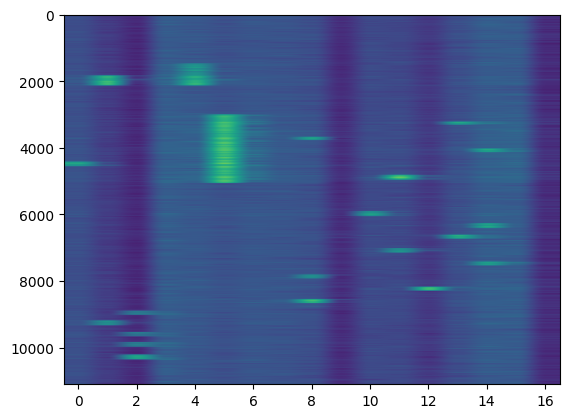

In [82]:
pics_login, info = get_pics_from_file(f'Hackaton/data/pics_LOGINMDP.bin')
plt.imshow(np.array(pics_login), aspect="auto")

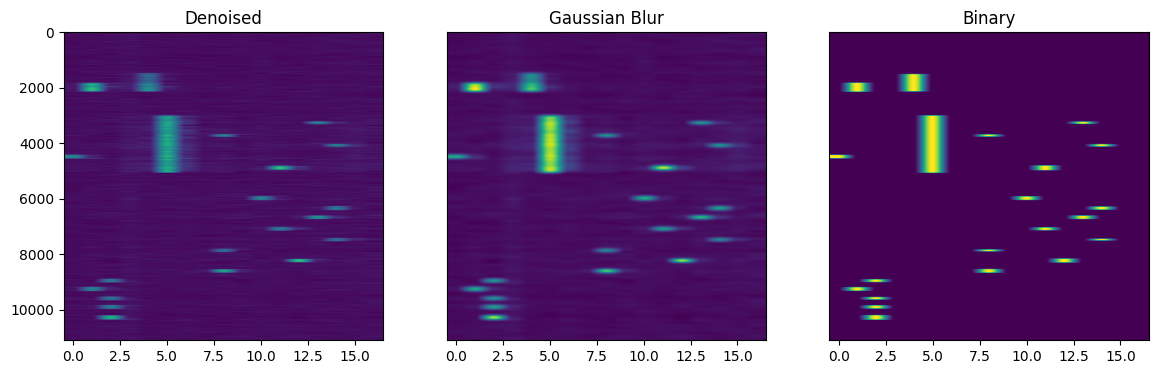

In [165]:
original_signal = (np.array(pics_login) - noise).clip(min=0)
gf = gaussian_filter1d(original_signal, 40, 0)
binary = (gf > 0.5).astype(int)
fig, axs = plt.subplots(1, 3, figsize=(14, 4))
i = 0
for ax, interp in zip(axs, [('Denoised', original_signal), ('Gaussian Blur', gf), ('Binary', binary)]):
    ax.imshow(interp[1],  aspect="auto")
    ax.set_title(interp[0])
    if i != 0:
        ax.get_yaxis().set_visible(False)
    i = 1

## Get Clusters

22


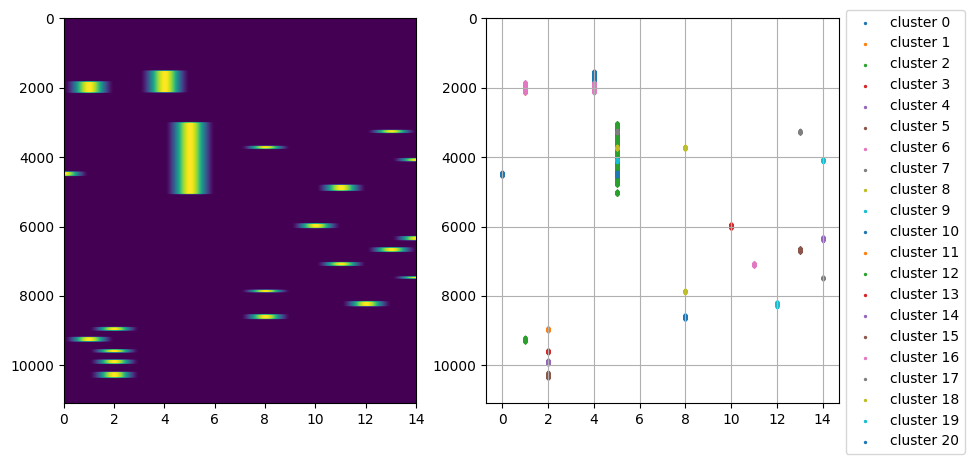

In [193]:
from scipy.ndimage import measurements

lw, num = measurements.label(binary, structure=[[0,1,0],
                                                [0,1,0],
                                                [0,1,0]])
prev = []
for i in range(lw.shape[0]):
    if np.count_nonzero(lw[i]) > 1:
        cur = []
        for j in range(lw.shape[1]):
            if lw[i][j] != 0:
                cur.append(j)
        if cur != prev:
            num += 1
            prev = cur
        for j in range(lw.shape[1]):
            if lw[i][j] != 0:
                lw[i][j] = num

clusters = []
nb = 0
for i in range(1, num + 1):
    line, col = np.where(lw == i)
    if line.shape[0] != 0:
        clusters.append((line[0], line[-1]))
        nb += 1
clusters.sort()
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(binary,  aspect="auto")
axs[0].set_xlim((0, 14))
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
color = 0
print(nb)
for k in range(1, np.max(lw)):
    scatter = []
    for i in range(lw.shape[0]):
        for j in range(lw.shape[1]):
            if lw[i][j] == k:
                scatter.append([i, j])
    if scatter != []:
        temp = np.array(scatter)
        axs[1].scatter(temp[:, 1], temp[:, 0], s=2, c=colors[color % len(colors)], label="cluster " + str(color))
        color += 1
axs[1].legend(loc="upper left", bbox_to_anchor=(1, 1.04))
axs[1].grid(True)
axs[1].set_ylim((0, lw.shape[0]))
axs[1].invert_yaxis()


In [179]:
for c in clusters:
    print(c)

(1515, 1826)
(1827, 2142)
(2143, 2154)
(3005, 5075)
(3228, 3311)
(3688, 3770)
(4041, 4128)
(4429, 4551)
(4808, 4980)
(5921, 6053)
(6290, 6404)
(6614, 6739)
(7039, 7144)
(7450, 7514)
(7836, 7905)
(8166, 8308)
(8543, 8676)
(8911, 9011)
(9196, 9326)
(9552, 9642)
(9850, 9968)
(10204, 10370)


In [170]:
# KNN
K = 200
# Create and fit model
neigh = KNeighborsClassifier(n_neighbors=K, weights="distance", n_jobs=-1)
neigh.fit(X_train, y_train)



KNeighborsClassifier(n_jobs=-1, n_neighbors=200, weights='distance')

In [171]:
y_pred = neigh.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.5673218818251579
                precision    recall  f1-score   support

    pics_0.bin       0.76      0.55      0.64       455
    pics_1.bin       0.27      0.11      0.16       395
    pics_2.bin       0.33      0.37      0.35       412
    pics_3.bin       0.35      0.18      0.24       451
    pics_4.bin       0.34      0.51      0.41       497
    pics_5.bin       0.36      0.31      0.33       437
    pics_6.bin       0.41      0.40      0.40       372
    pics_7.bin       0.36      0.48      0.41       390
    pics_8.bin       0.34      0.30      0.32       377
    pics_9.bin       0.52      0.53      0.52       385
    pics_A.bin       0.37      0.58      0.46       357
    pics_B.bin       0.36      0.28      0.32       377
    pics_C.bin       0.82      0.83      0.82       394
 pics_CTRL.bin       0.96      0.99      0.97       541
    pics_D.bin       0.53      0.45      0.49       406
    pics_E.bin       0.54      0.59      0.56       381
pics_ENTER.bin       0.78   

In [181]:
a = []
for cluster in clusters:
    lines = binary[cluster[0]:cluster[1], :]
    all_combinaisons = []
    for i in range(lines.shape[1]):
        if lines[0][i] and i != 15 and i != 3 and i != 16:
            all_combinaisons.append([k for k,v in pics_dic.items() if v == i])

    res = []
    to_predict = np.copy(original_signal[cluster[0]:cluster[1], :])
    if all_combinaisons:
        if len(all_combinaisons) == 9:
            mean = np.mean(to_predict, axis=0)
            res = [neigh.predict(mean.reshape(1, -1))[0]]


        else:
            combinaisons = list(itertools.product(*all_combinaisons))
            minlist = np.zeros(len(combinaisons))
            for i, combinaison in enumerate(combinaisons):
                pertubation_sum = np.zeros(17)
                for j in combinaison:
                    pertubation_sum += mean_dic[j]
                minlist[i] = np.linalg.norm(to_predict - pertubation_sum)

            res += list(combinaisons[np.argmin(minlist)])
    a.append(res)
        # res += list(combinaisons[np.argmin(minlist)])


In [190]:
import re

for i in a:
    print(i)

['pics_CTRL.bin']
['pics_SUPPR.bin', 'pics_CTRL.bin']
['pics_SUPPR.bin']
['pics_SHIFT.bin']
['pics_SHIFT.bin', 'pics_D.bin']
['pics_SHIFT.bin', 'pics_Y.bin']
['pics_SHIFT.bin', 'pics_A.bin']
['pics_M.bin', 'pics_SHIFT.bin']
['pics_SHIFT.bin', 'pics_I.bin']
['pics_B.bin']
['pics_A.bin']
['pics_C.bin']
['pics_K.bin']
['pics_A.bin']
['pics_Y.bin']
['pics_O.bin']
['pics_N.bin']
['pics_1.bin']
['pics_SUPPR.bin']
['pics_2.bin']
['pics_1.bin']
['pics_ENTER.bin']


In [ ]:
import re


def to_keys(x):
    return [([(re.search('pics_(.*).bin', key).group(1)) for key in keys[0]], keys[1]) for keys in x]


def translate(results):
    text = ""
    count = 0
    for i, _inputs in enumerate(results):
        keys, proba = _inputs

        if len(keys) == 0:
            continue

        if i > 0 and sorted(keys) == sorted(results[i - 1][0]):
            count += 1
        elif len(keys) == 1 and len(keys[0]) == 1:
            text += "".join(keys).lower()
        elif "SHIFT" in keys and len(keys) == 2:
            text += "".join([key for key in keys if key != "SHIFT"]).upper()
        else:
            text += " ".join(keys).upper()

        if i == len(results) - 1 or sorted(keys) != sorted(results[i + 1][0]):
            if count > 0:
                text += " [" + str(count) + "]"
                count = 0
            text += " (" + str(proba) + ")\n"
    return text


In [ ]:
def translate_array(results):
    res = []
    count = 0
    count_res = 0
    text = ""
    for i, _inputs in enumerate(results):

        keys, proba = _inputs
        if len(keys) == 0:
            continue

        if i > 0 and sorted(keys) == sorted(results[i - 1][0]):
            count += 1
        else:
            text = " ".join(keys)

        if i == len(results) - 1 or sorted(keys) != sorted(results[i + 1][0]):
            count_res = count
            if count > 0:
                count = 0
            if text != '':
                res.append((text, count_res, proba))
    return res



In [ ]:
predictions = []
n_line = 4900
for n_lines in clusters:
    all_combinaisons = []
    ctrl = False
    maj = False
    for i in range(gf.shape[1]):
        if gf[n_line][i] > 0.5 and i != 15 and i != 3 and i != 16:
            if i == 4:
                ctrl = True
            elif i == 5:
                maj = True
            else:
                all_combinaisons.append([k for k,v in pics_dic.items() if v == i])

    if all_combinaisons:
        combinaisons = list(itertools.product(*all_combinaisons))
        minlist = np.zeros(len(combinaisons))

        for i, combinaison in enumerate(combinaisons):
            to_predict = np.copy(original_signal[n_line])
            if ctrl:
                to_predict -= mean_dic['pics_CTRL.bin']
            if maj:
                to_predict -= mean_dic['pics_SHIFT.bin']
            for j in combinaison:
                to_predict = (to_predict - mean_dic[j]).clip(min=0)
            minlist[i] = np.sum(np.absolute(np.zeros(17) - to_predict))
        res = []
        if ctrl:
            res.append('pics_CTRL.bin')
        if maj:
            res.append('pics_SHIFT.bin')
        res += list(combinaisons[np.argmin(minlist)])

        predictions.append((res, 1/len(combinaisons)))

In [ ]:
predictions = to_keys(predictions)
print(predictions)

In [ ]:
t = translate_array(predictions)
for x in t:
    if x[1] > 5:
        print(f'{x[0]} {x[1]} {x[2]}')


In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(distance_threshold=2, n_clusters=None, compute_full_tree=True)
y_pred = clustering.fit_predict(to_cluster)
print(clustering.n_clusters_)

from itertools import cycle, islice
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1))))
plt.scatter(to_cluster[:, 1], np.full((to_cluster.shape[0], 1), 2000), s=10, color=colors[y_pred])
plt.gca().invert_yaxis()

In [ ]:
from skimage.filters import threshold_otsu


thresh = threshold_otsu(copy)
print(thresh)


copy = (copy > thresh).astype(int)
plt.imshow(copy, aspect="auto")

In [ ]:
plt.hist(copy.ravel(), bins=256)
plt.axvline(thresh, color='r')

In [ ]:
pics_name = os.listdir('Hackaton/data/')
pics_name.remove('pics_LOGINMDP.bin')


In [ ]:
pics_h, info = get_pics_from_file(f'Hackaton/data/pics_H.bin')
signal_h = np.array(pics_h) - signal_no.mean()
signal_h = signal_h.clip(min=0)
plt.imshow(signal_h, aspect="auto")

In [ ]:
pics_ctrl, info = get_pics_from_file(f'Hackaton/data/pics_CTRL.bin')
signal_ctrl = np.array(pics_ctrl) - signal_no.mean()
signal_ctrl = signal_ctrl.clip(min=0)
plt.imshow(signal_ctrl, aspect="auto")

In [ ]:
noise = signal_no.mean()

In [ ]:
pics_name = os.listdir('Hackaton/data/')
pics_name.remove('pics_LOGINMDP.bin')
data = dict()
for i in range(17):
    data[str(i)] = []
data["name"] = []

for pic_name in pics_name:
    pics_key, info = get_pics_from_file(f'Hackaton/data/{pic_name}')
    for pics in pics_key:
        for i, pic in enumerate(pics):
            data[str(i)].append(pic - noise)
        data["name"].append(pic_name)

df = pd.DataFrame(data)
df.head(6)


In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, 17]

print("X shape = " + str(X.shape))
print("y shape = " + str(y.shape))

In [ ]:
# List of name (X)


In [ ]:
# Normalize
#normalizer = Normalizer()
#X = normalizer.fit_transform(X)

# Standardize
#scaler = StandardScaler()
#X = scaler.fit_transform(X)






In [ ]:
minidf = df.loc[(df["name"] == "pics_1.bin") | (df["name"] == "pics_2.bin") | (df["name"] == "pics_5.bin")]
for i in range(0, 16, 2):
    ax = sns.lmplot(x=str(i), y=str(i+1),
      data=minidf,
      fit_reg=False,
      hue='name', # color by cluster
      legend=True,
      palette="Set1",
      scatter_kws={"s": 1})
    ax.set(ylim=(-0.5, 1.5))
    ax.set(xlim=(-0.5, 1.5))# specify the point size